# Introduction
In the lab we investigated the behavior of series RLC Circuits. We constructed a series RLC circuit with a 0.1&#956;F capacitor a 88 mH Inductor and a resistor. The resistance was adjusted in order to determine the response of the circuit when it is over damped critically damped and under damped. 
# Procedure
## Part 1
    In part 1 we constructed a circuit with an over-damped response. We used a 30 kOhm resistor in the circuit. The response was measured with an oscilloscope and included with the lab report.
## Part 2
    In part 2 we constructed two circuits one with a slightly over damped response and the other with an under damped response. The critical response was then estimated. By averaging the two resistances
## Part 3
    In part 3 we constructed a circuit with a under damped response and measured the response with an oscilloscope
## Part 4
In part 4 the theoritical response was determined and compared to the measured responses


In [1]:
def plot_osc(f_name,title,col_1="",col_2=""):
    temp = np.loadtxt(f_name,skiprows=4,delimiter=',')
    print(temp)
    print(temp.shape)
    in_signal = np.vstack((temp[:,0],temp[:,1]))
    out_signal = np.vstack((temp[:,0],temp[:,2]))
    print(temp[:,1])
    plt.scatter(in_signal[0],in_signal[1],label=col_1)
    plt.scatter(out_signal[0],out_signal[1],label=col_2)
    plt.xlim(min(in_signal[0,:]),max(in_signal[0,:]))
    ticks_dist = -(min(in_signal[0])-max(in_signal[0]))/5.0
    plt.xticks(np.arange(min(in_signal[0]),max(in_signal[0]),ticks_dist))
    plt.xlabel("Seconds")
    plt.ylabel("Volts")
    plt.title(title)
    legend = plt.legend()
    plt.show()

In [2]:
def plot_osc_2_scale(f_name,title,col_1="",col_2="",flipped=False):
    temp = np.loadtxt(f_name,skiprows=4,delimiter=',')
    #print(temp)
    #print(temp.shape)
    in_signal = np.vstack((temp[:,0],temp[:,1]))
    out_signal = np.vstack((temp[:,0],temp[:,2]))
    if(flipped==True):
        in_signal= np.vstack((temp[:,0],temp[:,2]))
        out_signal= np.vstack((temp[:,0],temp[:,1]))
    #print(temp[:,1])
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("time (s)")
    ax1.set_ylabel("Input signal (V)",color="tab:blue")
    ax1.plot(in_signal[0],in_signal[1],label=col_1,color="tab:blue")
    
    
    ax2=ax1.twinx()
    ax2.plot(out_signal[0],out_signal[1],label=col_2,color="tab:red")
    plt.xlim(min(in_signal[0,:]),max(in_signal[0,:]))
    ticks_dist = -(min(in_signal[0])-max(in_signal[0]))/5.0
    plt.xticks(np.arange(min(in_signal[0]),max(in_signal[0]),ticks_dist))
    ax2.set_ylabel("Output signal (V)",color="tab:red")
    #plt.xlabel("Seconds")
    #plt.ylabel("Volts")
    plt.title(title)
    #legend = plt.legend()
    
    fig.tight_layout()
    plt.show()

In [115]:
def plot_eq(f_name,equation,title,col_1="",col_2="",flipped=False,couple=False,num_ticks=5,x_scale=1):
    temp = np.loadtxt(f_name,skiprows=4,delimiter=',')
    #print(temp)
    #print(temp.shape)
    
    in_signal = np.vstack((temp[:,0],temp[:,1]))
    out_signal = np.vstack((temp[:,0],temp[:,2]))
    if(couple==True):
        out_signal[1]*=10
    equation_data = np.zeros(in_signal.shape[1])
    i=0;
    for x in in_signal[0,:]:
            equation_data[i]=equation(x)
            #print(x)
            i+=1

            
        #print(x)
    if(flipped==True):
        in_signal= np.vstack((temp[:,0],temp[:,2]))
        out_signal= np.vstack((temp[:,0],temp[:,1]))
    #print(temp[:,1])
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("time (s)")
    ax1.set_ylabel("Input signal (V)",color="tab:blue")
    ax1.plot(in_signal[0],in_signal[1],label=col_1,color="tab:blue")
    
    
    ax2=ax1.twinx()
    ax2.plot(out_signal[0],out_signal[1],label=col_2,color="tab:red")
    plt.xlim(min(in_signal[0,:])*x_scale,max(in_signal[0,:])*x_scale)
    ticks_dist = -(min(in_signal[0])-max(in_signal[0]))/num_ticks
    plt.xticks(np.arange(min(in_signal[0]),max(in_signal[0]),ticks_dist))
    ax2.set_ylabel("Voltage over Resistor (V)",color="tab:red")
    
    
    
    ax2.plot(out_signal[0],equation_data,color="tab:orange")
    ax2.set_ylim(1.25*min(out_signal[1]),1.25*max(out_signal[1]))
    #plt.xlabel("Seconds")
    #plt.ylabel("Volts")
    plt.title(title)
    #legend = plt.legend()
    
    fig.tight_layout()
    plt.show()

In [206]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += (stop-start)/step
def plot_i(eq,f_name,title,lim=0.00004):
    temp = np.loadtxt(f_name,skiprows=4,delimiter=',')
    #print(temp)
    #print(temp.shape)
    
    in_signal = np.vstack((temp[:,0],temp[:,1]))
    out_signal = np.vstack((temp[:,0],temp[:,2]))
    
    equation_data = np.zeros(in_signal.shape[1])
    i=0;
    for x in in_signal[0,:]:
            equation_data[i]=eq(x)
            #print(x)
            i+=1
    plt.plot(in_signal[0],equation_data)
    plt.title(title)
    
    ticks_dist = -(min(in_signal[0])-max(in_signal[0]))/6
    plt.xticks(np.arange(min(in_signal[0]),max(in_signal[0]),ticks_dist))
    plt.xlabel("Time (s)")
    plt.ylabel("Current (A)")
    #plt.ylim(-1.25*max(out_signal[1])/R,1.25*max(out_signal[1])/R)
    plt.ylim(-lim,lim)
    
        

In [135]:
def calc_over(R,L,C,t,debug=False):
    t=Decimal(t)
    R = Decimal(R)
    L = Decimal(L)
    C = Decimal(C)
    #print(R)
    #print(L)
    #print(C)
    a=R/(Decimal(2.0)*L)
    w=Decimal(1)/Decimal.sqrt(L*C)
    #print(a)
    #print(w)
    
    
    s1=-a+Decimal.sqrt(a**Decimal(2)-(w**Decimal(2)))
    s2=-a-Decimal.sqrt(a**Decimal(2)-(w**Decimal(2)))
    A1=Decimal(-2.0)/(L*(s1-s2))
    A2=Decimal(2.0)/(L*(s1-s2))
    out =  (A1*Decimal.exp(s1*t)+A2*Decimal.exp(s2*t))*R
    if(debug):
        print("t: "+str(t))
        print("i = ()"+str(A1)+"e^("+str(s1)+"*t)"+" + "+str(A2)+"e^("+str(s2)+"*t)"+")*"+str(R))
    #print("ran calc_over")
    #print(out)
    return float(out)
def calc_over_3(R,L,C,t,v0,debug=False):
    t=Decimal(t)
    R = Decimal(R)
    L = Decimal(L)
    C = Decimal(C)
    v0=Decimal(v0)
    #print(R)
    #print(L)
    #print(C)
    a=R/(Decimal(2.0)*L)
    w=Decimal(1)/(L*C)
    s1=-a+Decimal.sqrt(a*a-(w))
    s2=-a-Decimal.sqrt(a*a-(w))
    
    A1=(-v0-v0)/L-(s2*v0)/R
    A1/=(s1-s2)
    A2=v0/R-A1
    out =  (A1*Decimal.exp(s1*t)+A2*Decimal.exp(s2*t))*R
    if(debug):
        print("v(t) = "+format(A1,".6f")+"e^("+format(s1,".4f")+"*t)"+" + "+format(A2,".4f")+"e^("+format(s2,".4f")+"*t)"+")*"+format(R,".4f"))
    return out
def calc_over_4(R,L,C,t,v0,debug=False):
    t=Decimal(t)
    R = Decimal(R)
    L = Decimal(L)
    C = Decimal(C)
    v0=Decimal(v0)
    #print(R)
    #print(L)
    #print(C)
    a=R/(Decimal(2.0)*L)
    w=Decimal(1)/(L*C)
    
    s1=-a+Decimal.sqrt(a*a-(w))
    s2=-a-Decimal.sqrt(a*a-(w))
    
    A1=v0/(L*(s1-s2))

    A2=-A1
    out =  (A1*Decimal.exp(s1*t)+A2*Decimal.exp(s2*t))*R
    if(debug):
        print("v(t) = "+format(A1,".6f")+"e^("+format(s1,".4f")+"*t)"+" + "+format(A2,".4f")+"e^("+format(s2,".4f")+"*t)"+")*"+format(R,".4f"))
    return out
def calc_over_2(R,L,C,t):

    print(R)
    print(L)
    print(C)
    a=R/(2.0*L)
    w=1/(L*C)
    print(a)
    print(w)
    
    
    s1=-a+math.sqrt(a**2-w**2)
    s2=-a-Decimal.sqrt(a**Decimal(2)-w**Decimal(2))
    A1=Decimal(-2.0)/(L*s1-s2)
    A2=Decimal(2.0)/(L*s1-s2)
    out =  (A1*s1*Decimal.exp(s1*t)+A2*s2*Decimal.exp(s2*t))/L
    #print("ran calc_over")
    #print(out)
    return float(out)

In [5]:
def under_damped(R,L,C,t,v0,debug=False):
    t=Decimal(t)
    R = Decimal(R)
    L = Decimal(L)
    C = Decimal(C)
    v0=Decimal(v0)
    a=R/(Decimal(2)*L)
    w0=Decimal(1)/Decimal.sqrt(L*C)
    wd=Decimal.sqrt(w0*w0-a*a)
    B1=v0/R
    B2=(a*v0)/(wd*R)
    if(debug):
        print("wd: "+str(wd))
        print(format(B1,".4f")+"e^(-"+format(a,'.4f')+
              "t)*cos("+format(wd,".4f")+"*t)+"+format(B2,".4f")+"e^(-"+format(a,".4f")+"t)*sin("+format(wd,".4f")+"*t)")
    return B1*Decimal.exp(-a*t)*Decimal(math.cos(wd*t))+\
        B2*Decimal.exp(-a*t)*Decimal(math.sin(wd*t))

In [87]:
def under_damped_2(R,L,C,t,v0,i0,debug=False):
    t=Decimal(t)
    R = Decimal(R)
    L = Decimal(L)
    C = Decimal(C)
    v0=Decimal(v0)
    i0=Decimal(i0)
    a=R/(Decimal(2)*L)
    w0=Decimal(1)/Decimal.sqrt(L*C)
    wd=Decimal.sqrt(w0*w0-a*a)
    B1=i0
    B2=(v0+a*B1)/wd
    if(debug):
        print("v0: "+str(v0))
        print("wd: "+str(wd))
        print("b1: "+str(B1))
        print("b2: "+str(B2))
        print(format(B1,".4f")+"e^(-"+format(a,'.4f')+
              "t)*cos("+format(wd,".4f")+"*t)+"+format(B2,".4f")+"e^(-"+format(a,".4f")+"t)*sin("+format(wd,".4f")+"*t)")
    return B1*Decimal.exp(-a*t)*Decimal(math.cos(wd*t))+\
        B2*Decimal.exp(-a*t)*Decimal(math.sin(wd*t))

In [6]:
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from decimal import *
mpl.rcParams['figure.dpi'] = 500

In [7]:
calc_over(29.96e3,88e-3,99.6e-9,0.001)
#calc_over_2(29.96e3,88e-3,99.6e-9,0)

-1.4328570061263004


# Discussion

## Part 1
    We used a 30 kOhm resistor in order to create an over-damped response. A plot of the response is shown below. The response appears to be highly damped and it never reaches steady state before the next step in the cycle. The theoriticial response was calcululated by choosing an arbritary initial voltage over the capacitor. The voltage accross the capacitor was not measured as the osciliscope only has two probes. The initial current was then found using ohm's law. The equations for the current with respect to time were then solved for interms of capactince, resistance of the resister, and inductance. The initial voltage was then manually adjusted to fit the curve the best.

v(t) = 0.000043e^(-335.4494*t) + -0.0000e^(-340119.0961*t))*29960.0000


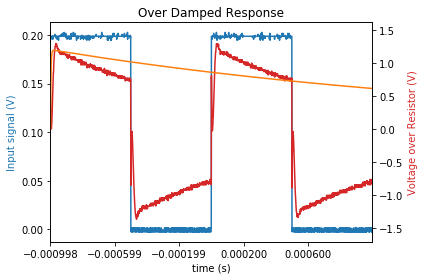

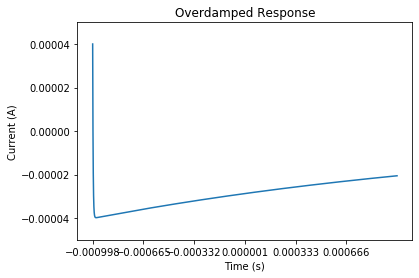

In [242]:
def eq(x):
    x=x+0.000998
    return (2.948*10**-3)*math.exp(-335.0*x)+(-2.99)*math.exp(-34016.0*x)
def eq2(t):
    #return 0
    return calc_over_4(29.964e3,88e-3,99.6e-9,t+0.000998,1.2)
a=calc_over_4(29.96e3,88e-3,99.6e-9,0+0.000499,1.3,debug=True)
plot_eq("scope_8.csv",eq2,
"Over Damped Response",flipped=True)

def i(t):
    return float(calc_over_3(29.964e3,88e-3,99.6e-9,t+0.000998,1.2))/29.964e3
plot_i(i,"scope_8.csv","Overdamped Response",lim=0.00005)

## Part 2
    In part 2 the resistance that generated a critically damped response was estimated. First a over damped response was generated by adjusting a variable resistor. Next an under damped response was generated. The overdamped response was generated with a resistance of 10 kOhms. The under-damped response was generated with a resistance of 2.4 kOhms. The under dampeld and over damped responses are shown below. The theoritical value of resistance for the criticial response is  1879 Ohms. That was found by setting alpha and omega equal to each other and solving for R. The theoriticial curves for each of the below responses were calculated in the same way as in figure 1. The resulting equations are shown below.

v(t) = 0.001077e^(-5173.7026*t) + -0.0011e^(-22052.4337*t))*2395.9000


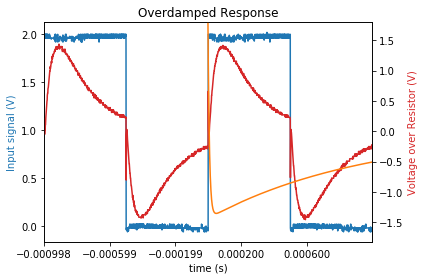

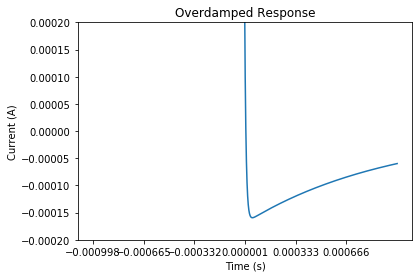

In [245]:
#plot_osc_2_scale("/home/nick/sshfs/Documents/lab07/scope_10.csv","2_lower")
def eq(t):
    return calc_over_3(9718,0.088,99.6e-9,t,1.4)
def i(t):
    return float(calc_over_3(9718,0.088,99.6e-9,t,1.6))/9718.0
a=calc_over_4(2395.9,0.088,99.6e-9,0+0.0005,1.6,debug=True)
plot_eq("scope_10.csv",eq,"Overdamped Response",couple=True)
plot_i(i,"scope_10.csv","Overdamped Response",lim=0.0002)

v(t) = 0.000678e^(-0.0000*t) + -0.0007e^(-26806.8182*t))*2359.0000


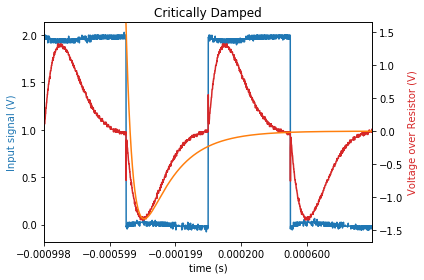

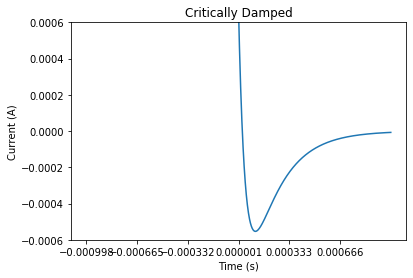

In [250]:

def eq(t):
    #t=t+0.000998
    return calc_over_3(2395.9,0.088,99.6e-9,t+0.0005,1.6)
a= calc_over_4(2359,0.088,99.6-9,0+0.0006,1.6,debug=True)
def i(t):
    return calc_over_3(2395.9,0.088,99.6e-9,t,1.6)
plot_eq("scope_11.csv",eq,
"Critically Damped",couple=True)
def i(t):
    return calc_over_3(2395.9,0.088,99.6e-9,t,1.6)/2395
plot_i(i,"scope_11.csv","Critically Damped",lim=0.0006)

The response shown is not an under damped response. That can be attributed to human error in the laboratory. The response does appear to be a roughly critically damped response giving a good estimate for the critical resistance which would be near 1879 Ohms.

## Part 3
An under damped response was generated using a 1kOhm resistor. A plot of the voltage over the resistor is shown below. The response appears to be heavily under damped. The theoreticial response was calculated. The final equation is shown below.

In [11]:
a=under_damped(1398,0.088,99.6e-9,-0.00048,-0.5,debug=True)

wd: 7141.330210679804718982150330
-0.0004e^(-7943.1818t)*cos(7141.3302*t)+-0.0004e^(-7943.1818t)*sin(7141.3302*t)


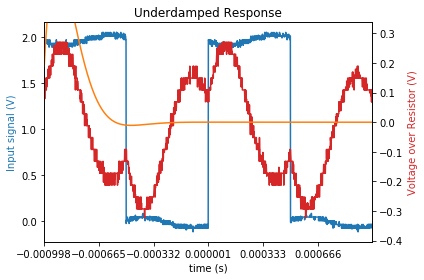

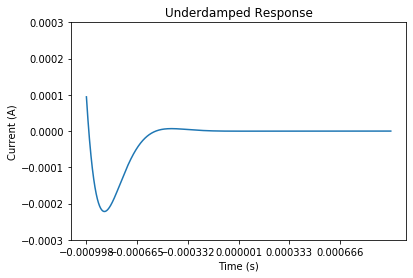

In [241]:
def eq(t):
    return float(under_damped_2(1398,0.08,99.6e-9,t+0.00005,1,2.e-4))
def i(t):
    return under_damped(1398,0.088,99.6e-9,t,-0.4)/1398
under_damped_2(1398,0.05,99.6e-9,0.00,5,7.1e-4)
plot_eq("scope_14.csv",eq,"Underdamped Response",couple=True,num_ticks=6)
plot_i(i,"scope_14.csv","Underdamped Response",lim=0.0003)


# Conclusion
